<a href="https://colab.research.google.com/github/ManelSoengas/Python_LM/blob/main/Python_4_Manipulacio_dades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import seaborn as sns

# Carregar el dataset Titanic
df = sns.load_dataset("titanic")

# Mostrar les 5 primeres files
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Observa les columnes del dataset:**

---



1. survived: 1 = sobreviu, 0 = no sobreviu
2.  pclass: classe del passatger (1a, 2a, 3a)
3.  age, sex, fare: edat, sexe i tarifa del bitllet
embark_town: ciutat d’embarcament

In [2]:
##Explorar les Dades
#Podem obtenir informació ràpida sobre el dataset:

# Dimensions del dataset
print("Dimensió:", df.shape)

# Tipus de dades
print(df.info())

# Estadístiques bàsiques de les columnes numèriques
df.describe()


Dimensió: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#Exercici 1:
#Quantes dades falten en el dataset? Usa df.isnull().sum().

df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [5]:
#Filtrar i Seleccionar Dades
#Podem seleccionar columnes i filtrar files segons condicions:

# Seleccionar columnes específiques
df[['sex', 'age', 'fare']].head()




,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


In [6]:
# Filtrar passatgers que van sobreviure
sobreviscuts = df[df['survived'] == 1]
print("Nombre de supervivents:", sobreviscuts.shape[0])



Nombre de supervivents: 342


In [7]:
# Filtrar per condicions múltiples (dones de 1a classe)
df[(df['sex'] == 'female') & (df['pclass'] == 1)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False


In [16]:
#Exercici 2:
#Quants passatgers homes de 3a classe hi ha? (Pista: filtra per sex='male' i pclass=3.)

# Filtrar per condicions múltiples (dones de 1a classe)
homes_3a= df[(df['sex'] == 'male') & (df['pclass'] == 3)].head()
print("Nombre de homes 3ª:", homes_3a.shape[0])

Nombre de homes 3ª: 5


In [21]:
#Neteja de Dades
#Les dades poden tenir valors nuls (NaN) que han de ser gestionats.

# Veure quins valors falten
df.isnull().sum()



,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [23]:
# Omplir valors nuls amb la mitjana de l'edat
df['age'] = df['age'].fillna(df['age'].mean())





In [24]:
df = df.dropna(subset=['embark_town'])


In [25]:
#Exercici 3:
#Substitueix els valors nuls de fare amb la mitjana d’aquesta columna.
df['fare'] = df['fare'].fillna(df['fare'].mean())


In [26]:
#Estadística Descriptiva i Agrupació
#Podem fer càlculs estadístics com la mitjana d’edat per classe de passatger:

# Mitjana d’edat per classe
df.groupby("pclass")["age"].mean()


,age
pclass,
1,36.927073
2,29.866958
3,26.403259


In [27]:
df.groupby("sex")["survived"].value_counts()


sex     survived
female  1           231
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [28]:
#Exercici 4:
#Calcula la tarifa mitjana pagada per passatgers de cada classe (pclass).
# Mitjana de la tarifa per classe
df.groupby("pclass")["fare"].mean()


,fare
pclass,
1,84.193516
2,20.662183
3,13.675550


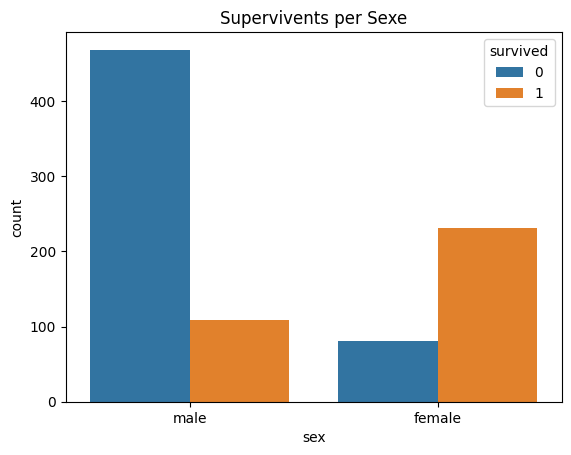

In [29]:
#Visualització de Dades
#Utilitzem seaborn per representar gràfics:

import matplotlib.pyplot as plt

# Gràfic de supervivència per sexe
sns.countplot(data=df, x="sex", hue="survived")
plt.title("Supervivents per Sexe")
plt.show()


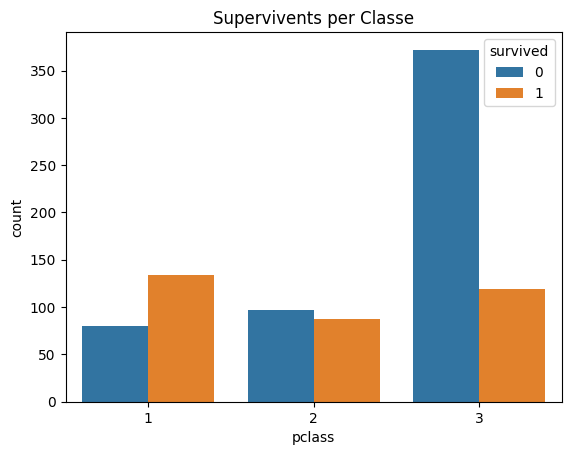

In [30]:
#Exercici 5:
#Fes un gràfic de barres per veure quants passatgers hi ha per cada classe (pclass).

import matplotlib.pyplot as plt

# Gràfic de supervivència per sexe
sns.countplot(data=df, x="pclass", hue="survived")
plt.title("Supervivents per Classe")
plt.show()
